In [15]:
import os
import pandas as pd
import numpy as np
import geopandas as gpd
from simpledbf import Dbf5

from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor,MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import datasets
from sklearn.svm import SVR

import operator 
from ReclassifyLandUse import ReC
from DamageEstimation import DepthDamage
import pickle
from pyogrio import read_dataframe, write_dataframe
from geo_northarrow import add_north_arrow

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib_scalebar.scalebar import ScaleBar
from matplotlib.patches import Patch

import warnings
import seaborn as sns
import scipy.stats as stats

warnings.filterwarnings('ignore')


In [16]:
fp = "../inputs/data_export/Parcels_tf6_5_area_unique_dist.shp"
Geodata0 = read_dataframe(fp)
print( Geodata0.columns )
Geodata0['TARGET_FID']  = Geodata0['index']
Geodata0                = Geodata0.to_crs({'init':'epsg:4326'})

dbfp            = "../inputs/data_export/Parcels_tf6_5_ExportTable.dbf"
dbf             = Dbf5( dbfp )
neighbors_df    = dbf.to_dataframe()
print( neighbors_df.columns )


Index(['index', 'OBJECTID', 'GEOID', 'ID', 'NAME', 'CITY', 'ST', 'ZIP',
       'SITUS_NO', 'SITUS',
       ...
       'Accessb', 'logAccess', 'release', 'capture_da', 'area_2', 'pararea',
       'FID_1', 'NEAR_FID', 'NEAR_DIST', 'geometry'],
      dtype='object', length=129)
Index(['IN_FID', 'NEAR_FID', 'NEAR_DIST', 'NEAR_RANK'], dtype='object')


<Axes: >

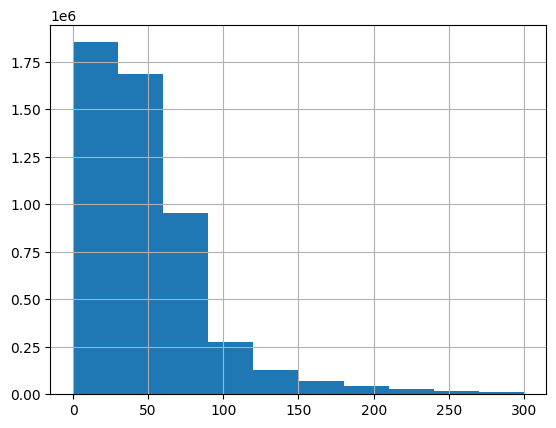

In [42]:
neighbors_df2 = neighbors_df.loc[  neighbors_df['NEAR_DIST'] < 300 ]
neighbors_df2.NEAR_DIST.hist()

In [34]:
print( len(  Geodata0 ) )
print( len(  Geodata0.index .unique() ) )
neighbor_list = []
geoneighbors  = {}
for idx, row in Geodata0.iterrows():
    fidi        = row['index']
    neighborsi  = neighbors_df2.loc[ (neighbors_df2['IN_FID'] == fidi) ]['NEAR_FID'].values.tolist()
    #print( len(neighborsi) )
    if idx % 20000 == 0:
        print( fidi )
    #neighbor_list.append( ','.join( str(x) for x in neighborsi ) )
    neighbor_list.append( len(neighborsi) )
    geoneighbors[ fidi ] = neighborsi
    #break
print( len(neighbor_list) )

170194
170194
0
20000
40000
60000
80000
100000
120000
140000
160000
170194


(array([2.10000e+01, 9.40000e+01, 2.32000e+02, 3.22000e+02, 4.06000e+02,
        4.55000e+02, 4.89000e+02, 4.64000e+02, 5.27000e+02, 1.67184e+05]),
 array([ 0.,  3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30.]),
 <BarContainer object of 10 artists>)

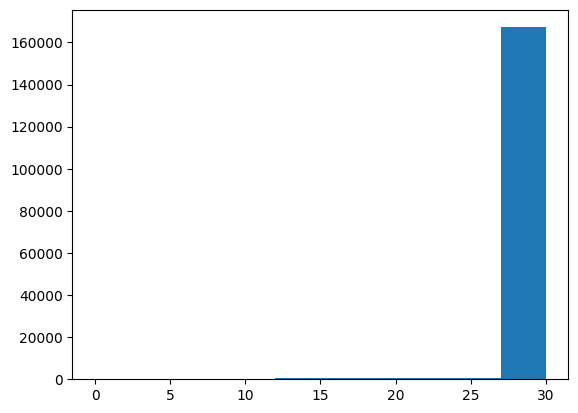

In [35]:
plt.hist(neighbor_list)

In [36]:
import pickle

dictpth    = r'../inputs/saved_neighbor_dict.pkl'
with open(dictpth, 'wb') as handle:
    pickle.dump( geoneighbors, handle, protocol = pickle.HIGHEST_PROTOCOL)


In [ ]:
with open(dictpth, 'rb') as handle:
    b = pickle.load(handle)